/var/folders/yj/6cwm4qyj6qz3dkx7t8z3qxc40000gn/T/ipykernel_14072/301350846.py:33: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(rpm, torque, degree)


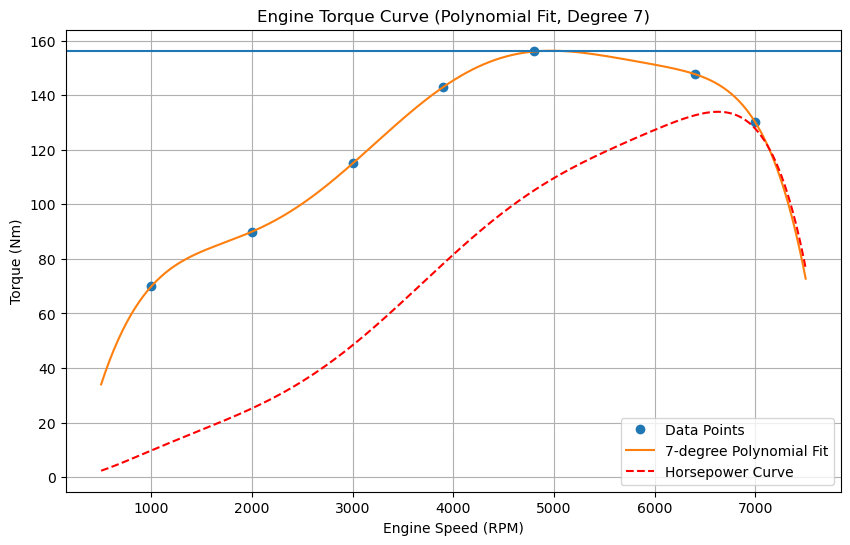

Coefficients of the fitted polynomial:
[-1.14330990e-23  1.99985638e-19 -7.07685459e-16 -6.43823615e-12
  5.99064874e-08 -1.81442633e-04  2.52347187e-01 -5.38536722e+01]
"coefficient_0": -53.853672195450784,
"coefficient_1": 0.252347186872446,
"coefficient_2": -0.00018144263305688358,
"coefficient_3": 5.990648744811352e-08,
"coefficient_4": -6.438236147827958e-12,
"coefficient_5": -7.07685459274741e-16,
"coefficient_6": 1.9998563783149972e-19,
"coefficient_7": -1.1433098953060049e-23,


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
"""
points = np.array([
    [1000, 130],
    [2000, 230],
    [3000, 265],
    [4000, 280],
    [5400, 294],
    [6500, 282],
    [7300, 269.3],
    [7800, 225],
    
])"""
points = np.array([
    [1000, 70],
    [2000, 90],      # rising torque
    [3000, 115],      # mid-range torque
    [3900, 143],     # pre-peak
    [4800, 156],     # peak torque
    #[5200, 152],     # post-peak
    [6400, 147.7],   # matches power-based torque
    [7000, 130],      # high rpm drop
])

maxTq = 156
rpm = points[:, 0]
torque = points[:, 1]

degree = 7
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min()-500, rpm.max()+500, 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
hp_smooth = (torque_smooth * rpm_smooth) / 7127
plt.plot(rpm_smooth, hp_smooth, '--', label="Horsepower Curve", color="red")

plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f'"coefficient_{i}": {coefficients[len(coefficients)-i-1]},')


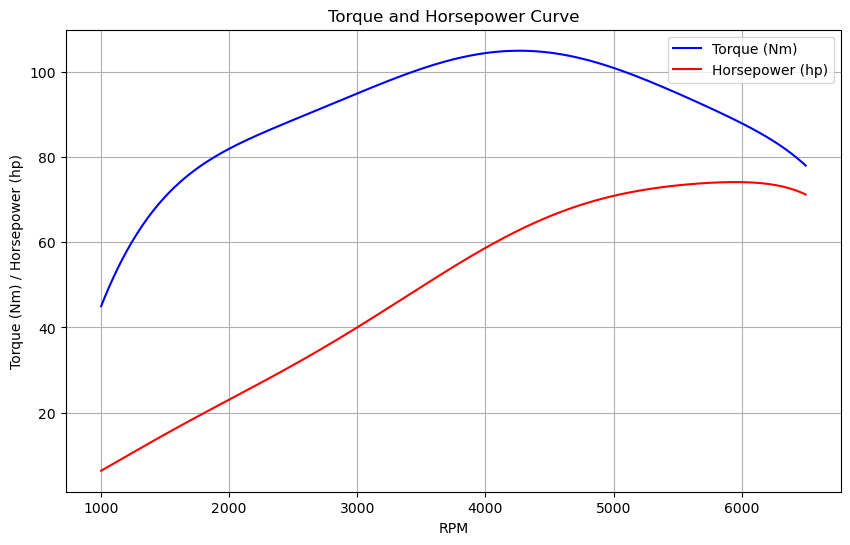

RPM = 1000, Torque = 45.00 Nm, Horsepower = 6.32 hp
RPM = 2000, Torque = 82.00 Nm, Horsepower = 23.03 hp
RPM = 3500, Torque = 100.79 Nm, Horsepower = 49.54 hp
RPM = 5000, Torque = 101.00 Nm, Horsepower = 70.92 hp
RPM = 6200, Torque = 84.70 Nm, Horsepower = 73.75 hp
RPM = 6500, Torque = 78.04 Nm, Horsepower = 71.24 hp
RPM = 7000, Torque = 54.32 Nm, Horsepower = 53.39 hp


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_poly_with_hp(coeff_dict, x_start, x_end, num_points=500):
    coeffs = [coeff_dict[f"coefficient_{i}"] for i in range(len(coeff_dict))]
    coeffs = coeffs[::-1]  # reverse order

    rpm = np.linspace(x_start, x_end, num_points)
    torque = np.polyval(coeffs, rpm)  # torque in Nm

    # Calculate horsepower
    power_watts = torque * (2 * np.pi * rpm) / 60
    horsepower = power_watts / 745.7

    plt.figure(figsize=(10,6))
    plt.plot(rpm, torque, label='Torque (Nm)', color='blue')
    plt.plot(rpm, horsepower, label='Horsepower (hp)', color='red')
    plt.xlabel('RPM')
    plt.ylabel('Torque (Nm) / Horsepower (hp)')
    plt.title('Torque and Horsepower Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

    return coeffs

def evaluate_and_print(coeffs, x_values):
    y_values = np.polyval(coeffs, x_values)
    for xv, yv in zip(x_values, y_values):
        power_w = yv * (2 * np.pi * xv) / 60
        hp = power_w / 745.7
        print(f"RPM = {xv:.0f}, Torque = {yv:.2f} Nm, Horsepower = {hp:.2f} hp")

coefficients_dict = {
   "coefficient_0": -127.57310620518504,
"coefficient_1": 0.3082052916145408,
"coefficient_2": -0.00017963692176934233,
"coefficient_3": 4.822643113424948e-08,
"coefficient_4": -3.4923188921258585e-12,
"coefficient_5": -9.09846444027128e-16,
"coefficient_6": 1.907700384304408e-19,
"coefficient_7": -1.029947654051e-23,
}

coeffs = plot_poly_with_hp(coefficients_dict, 1000, 6500)

x_points = [1000, 2000, 3500, 5000, 6200, 6500, 7000]
evaluate_and_print(coeffs, x_points)
